# Tutorial 4: Effective Data Visualization 

### Lecture and Tutorial Learning Goals:

Expand your data visualization knowledge and tool set beyond what we have seen and practiced so far. We will move beyond scatter plots and learn other effective ways to visualize data, as well as some general rules of thumb to follow when creating visualizations. All visualization tasks this week will be applied to real world data sets. Remember, it is an iterative process to answer questions and each step taken should have a good reason behind it.  

After completing this week's lecture and tutorial work, you will be able to:

- Describe when to use the following kinds of visualizations:
    - scatter plots
    - line plots
    - bar plots
    - histogram plots
- Given a dataset and a question, select from the above plot types to create a visualization that best answers the question
- Given a visualization and a question, evaluate the effectiveness of the visualization and suggest improvements to better answer the question
- Identify rules of thumb for creating effective visualizations
- Define the three key aspects of ggplot objects:
    - aesthetic mappings
    - geometric objects
    - scales
- Use the `ggplot2` library in R to create and refine the above visualizations using:
    - geometric objects: `geom_point`, `geom_line`, `geom_histogram`, `geom_bar`, `geom_vline`, `geom_hline`
    - scales: `scale_x_continuous`, `scale_y_continuous`
    - aesthetic mappings: `x`, `y`, `fill`, `colour`, `shape`
    - labelling: `xlab`, `ylab`, `labs`
    - font control and legend positioning: `theme`
    - flipping axes: `coord_flip`
    - subplots: `facet_grid`
- Describe the difference in raster and vector output formats
- Use `ggsave` to save visualizations in `.png` and `.svg` format

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

In [147]:
### Run this cell before continuing. 

library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("tests_tutorial_04.R")
source("cleanup_tutorial_04.R")

**Question 0.1** 
<br> {points: 1}

Match the following definitions with the corresponding aesthetic mapping or function used in R:

*Definitions*

A. Prevents a chart from being stacked. It preserves the vertical position of a plot while adjusting the horizontal position. 

B. In bar charts, this aesthetic fills in the bars by a specific colour or separates the counts by a variable different from the x-axis. 

C. In bar charts, it outlines the bars but in scatterplots, it fills in the points (colouring them based on a particular variable aside from the x/y-axis). 

D. This makes the height of each bar equal to the number of cases in each group, and it is incompatible with mapping values to the y aesthetic. This stat basically allows the y-axis to represent particular values from the data instead of just counts. 

E. This aesthetic allows further visualization of data by varying data points by shape (modifying their shape based on a particular variable aside from the x/y-axis).

F. Labels the y-axis. 


*Aesthetics and Functions*

1. `colour`
2. `dodge`
3. `fill`
4. `identity`
5. `ylab`
6. `shape`

For every description, create an object using the letter associated with the definition and assign it to the corresponding number from the list above. For example: `B <- 1`

In [148]:
# Replace the fail() with your answer. 

# your code here
A <- 2
B <- 3
C <- 1
D <- 4
E <- 6
F <- 5

In [149]:
test_0.1()

[1] "Success!"


**Question 0.2** True or False:
<br> {points: 1}

We should save a plot as an `.svg` file if we want to be able to rescale it without losing quality.

*Assign your answer to an object called `answer0.2`. Make sure your answer is in lowercase letters and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [150]:
# Replace the fail() with your answer.
 
# your code here
answer0.2 <- "true"

In [151]:
test_0.2()

[1] "Success!"


## 1. Data on Personal Medical Costs 

As we saw in the worksheet, data scientists work in all types of organizations and with all kinds of problems. One of these types of organizations are companies in the private sector that work with health data. Today we will be looking at data on personal medical costs. There are varying factors that affect health and consequently medical costs. Our goal for today is to determine how are variables related to the medical costs billed by health insurance companies. 


To analyze this, we will be looking at a dataset that includes the following columns:

* `age`: age of primary beneficiary
* `sex`: insurance contractor gender: female, male
* `bmi`: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/$m^{2}$) using the ratio of height to weight, ideally 18.5 to 24.9
* `children`: number of children covered by health insurance / number of dependents
* `smoker`: smoking
* `region`: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.
* `charges`: individual medical costs billed by health insurance

*This dataset, was taken from the [collection of Data Sets](https://github.com/stedy/Machine-Learning-with-R-datasets) created and curated for the [Machine Learning with R](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) book by Brett Lantz.*

**Question 1.1** Yes or No: 
<br> {points: 1}

Based on the information given in the cell above, do you think the column `charges` includes quantitative/numerical data? 

*Assign your answer to an object called `answer1.1`. Make sure your answer is written in lowercase and is surrounded by quotation marks (e.g. `"yes"` or `"no"`).*

In [152]:
# Replace the fail() with your answer. 

# your code here
answer1.1 <- "yes"

In [153]:
test_1.1()

[1] "Success!"


**Question 1.2** Multiple Choice:
<br> {points: 1}

Assuming overplotting is not an issue, which plot would be the most effective to compare the relationship of `age` and `charges`?

A. Scatterplot 

B. Stacked Bar Plot 

C. Bar Plot 

D. Histogram 

*Assign your answer to an object called `answer1.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [154]:
# Replace the fail() with your answer. 

# your code here
answer1.2 <- "A"

In [155]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br> {points: 1}

Read the `insurance.csv` file in the `data/` folder and use `tail` to view the last 6 individuals presented. 

*Assign your answer to an object called `insurance`.*

In [156]:
# your code here
insurance <- read_csv("data/insurance.csv")
tail(insurance) # preview the last 6 rows of the data set

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  charges = col_double()
)



age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
52,female,44.70,3,no,southwest,11411.685
50,male,30.97,3,no,northwest,10600.548
18,female,31.92,0,no,northeast,2205.981
18,female,36.85,0,no,southeast,1629.833
21,female,25.80,0,no,southwest,2007.945
61,female,29.07,0,yes,northwest,29141.360


In [157]:
test_1.3()

[1] "Success!"


**Question 1.4** 
<br> {points: 3}

Looking over the loaded data shown above, what observations can you make about the relationship between medical charges and age? How about medical charges and BMI? Finally, what about medical charges and smoking? 

Also, comment on whether our observations might change if we visualize the data? And/or whether visualizing the data might allow us to more easily make observations about the relationships in the data as opposed to trying to make them directly from the data table?

Answer in the cell below.

It seems there is a positive relationship between age and medical charges. The older a person gets, the higher their medical charges are. The people from 18-21 in the last 6 rows all have medical charges around 2,000, while the people aged 50-61 in the last 6 rows all have medical charges over 10,000.

Our observations might change once we visualize the data, as 6 data points is not enough to conclude if there is a relationship or not. Visualizing the data will make it much easier to make observations as we are able to see the bigger picture plotted out instead of just plain numbers, which don't show the bigger picture.

**Question 1.5**
<br> {points: 1}

According to the National Heart, Lung and Blood Institute of the US: "The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure, type 2 diabetes, gallstones, breathing problems, and certain cancers". 

Based on this information, we can hypothesize that individuals with a higher BMI are likely to have more medical costs. Let's use our data and see if this holds true. Create a scatter plot of `charges` (y-axis) versus `bmi` (x-axis).

In the scaffolding we provide below, we suggest that you set `alpha` to a value between 0.2 and 0.4. `alpha` sets the transparency of points on a scatter plot, and increasing transparencing of points is one tool you can use to deal with over plotting issues.

*Assign your answer to an object called `bmi_plot`. Make sure to label your axes appropriately.*

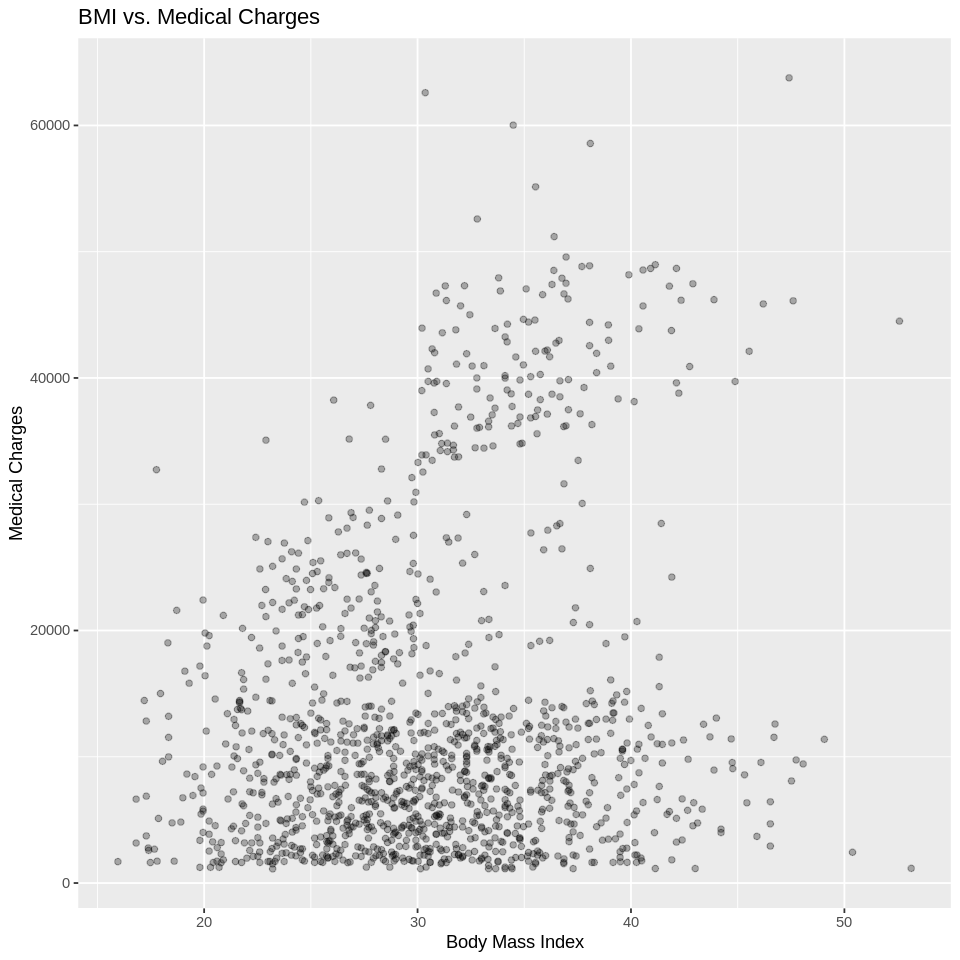

In [158]:
options(repr.plot.width = 8, repr.plot.height = 8) #Remember to set your plot sizes to an appropiate size

bmi_plot <- insurance %>%
   ggplot(aes(x = bmi, y = charges)) + 
       geom_point(alpha = 0.3) + # Deals with the transparency of the points, set it to an appropiate value
       xlab("Body Mass Index") +
       ylab("Medical Charges") +
       ggtitle("BMI vs. Medical Charges")

# your code here
# fail() # No Answer - remove if you provide an answer
bmi_plot

In [159]:
test_1.5()

[1] "Success!"


**Question 1.6**
<br> {points: 3}

Analysis: Comment on the effectiveness of the plot. Take into consideration the rules of thumb discussed in lecture. Also comment on what could be improved for this plot and also what is done correctly. 

Answer in the cell below.

The plot is somewhat effective. It shows the visualization between BMI and Medical Charges better compared to just looking at the raw data on a table.

However, it could be improved. The plot could be made more legible, with by using different colours, for instance.

There are lots of data points on the plot, almost to the point of overplotting. It is good that we used some transparency to reduce that. With so many data points, the plot doesn't tell the story of the data very well. 

For instance, why are there so many with high body mass indexes but low (under 20,000) medical charges? There's also a significant amount of people with high body mass index and high medical charges. What variable in the data set (region, smoker, etc.) could also differentiate them? 

I believe using different shapes related to different variables could improve the plot. For instance, maybe region could play a difference in medical charges too.

**Question 1.7**
<br> {points: 3}

Analysis: What do you observe from the scatter plot? Do the data suggest that there might be evidence of a relationship between BMI and medical costs of individuals? 
From this plot alone, can we say higher BMI causes higher medical charges? Why or why not? 

Answer in the cell below. 

The data suggests there is some relationship between BMI and medical costs. Some people have increased medical charges with increased body mass index. However, there is also a significant amount of people with high body mass indexes but relatively low medical charges. 

Therefore, from this plot alone, it is not enough to say that a higher BMI causes higher medical charges. There could be other variables that impact medical charges apart from BMI. For instance, whether the person smokes or even their region could play a role in their medical charges.

**Question 1.8**
<br> {points: 3}

Again, based on information from the National Heart, Lung and Blood Institute of the US, smoking cigarettes is said to be a risk factor for obesity. Create the same plot as you did in **Question 1.5** but this time add the `colour` aesthetic to observe if smoking might affect the body mass of individuals. Also, use `labs` to format your legend title. You may want to pass `alpha = 0.4` to the scatter geometric object to make the scatter points translucent (just for your own ease of visualization; you don't have to and we won't check that when grading).

*Assign your answer to an object called `smoke_plot`. Make sure to label your axes appropriately.*

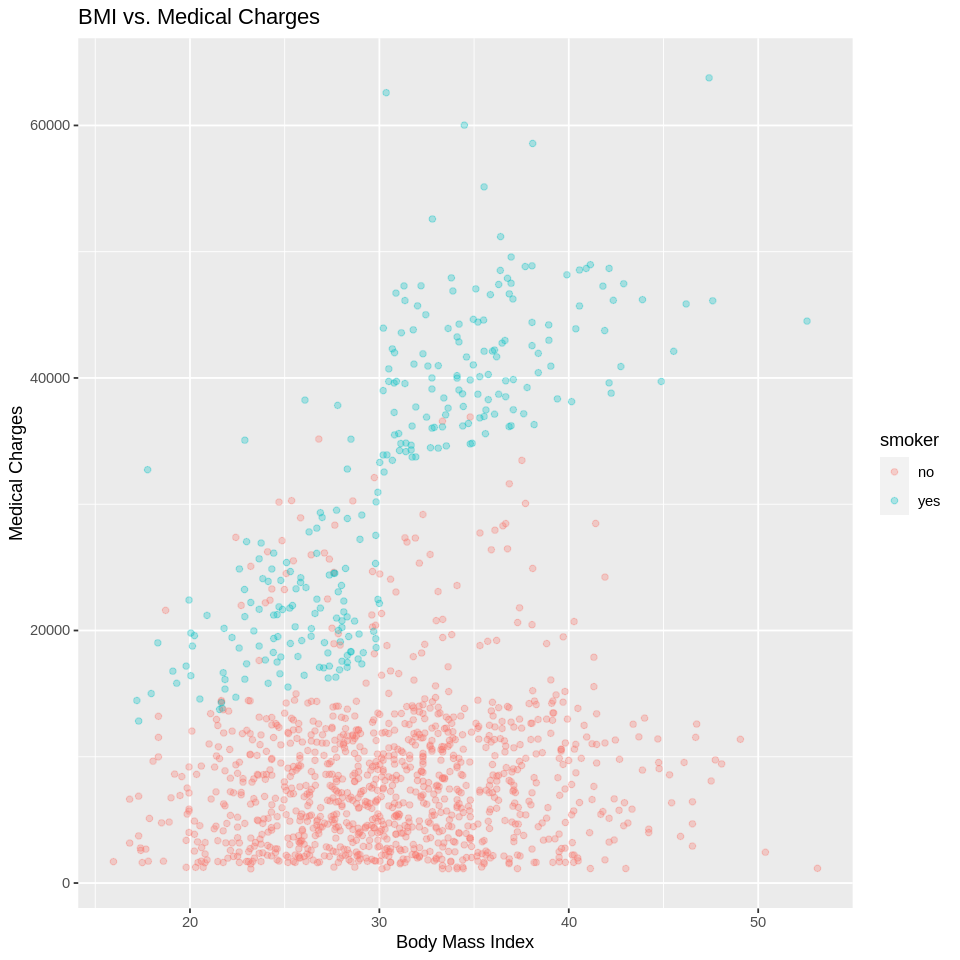

In [160]:
# your code here
# fail() # No Answer - remove if you provide an answer
smoke_plot <- insurance %>%
   ggplot(aes(x = bmi, y = charges, colour = smoker)) + 
       geom_point(alpha = 0.3) + # Deals with the transparency of the points, set it to an appropiate value
       xlab("Body Mass Index") +
       ylab("Medical Charges") +
       ggtitle("BMI vs. Medical Charges")
smoke_plot

In [161]:
# Most of the tests for this question are hidden. You have to decide whether you've created a good visualization!
# here's one test to at least ensure you named the plot object correctly:
expect_true(exists("smoke_plot"))



**Question 1.9.0** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have a lower BMI than non-smokers. 

*Assign your answer to an object called `answer1.9.0`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [162]:
# Replace the fail() with your answer. 

# your code here
answer1.9.0 <- "false"

In [163]:
test_1.9.0()

[1] "Success!"


**Question 1.9.1** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have higher medical charges than non-smokers.

*Assign your answer to an object called `answer1.9.1`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [164]:
# Replace the fail() with your answer. 

# your code here
answer1.9.1 <- "true"

In [165]:
test_1.9.1()

[1] "Success!"


**Question 1.10**
<br> {points: 1}

Finally, create a bar graph that displays the proportion of smokers for both females and males in the data set. Use sex as the horizontal axis, and colour the bars to differentiate between smokers / nonsmokers. This could, for example, be used help us determine whether we should consider smoking behaviour when exploring whether there is a relationship between sex and medical costs.

*Assign your answer to an object called `bar_plot`. Make sure to label your axes appropriately.*

>*Note - many historical datasets treated sex as a variable where the possible values are only binary: male or female. This representation in this question reflects how the data were historically collected and is not meant to imply that we believe that sex is binary.*

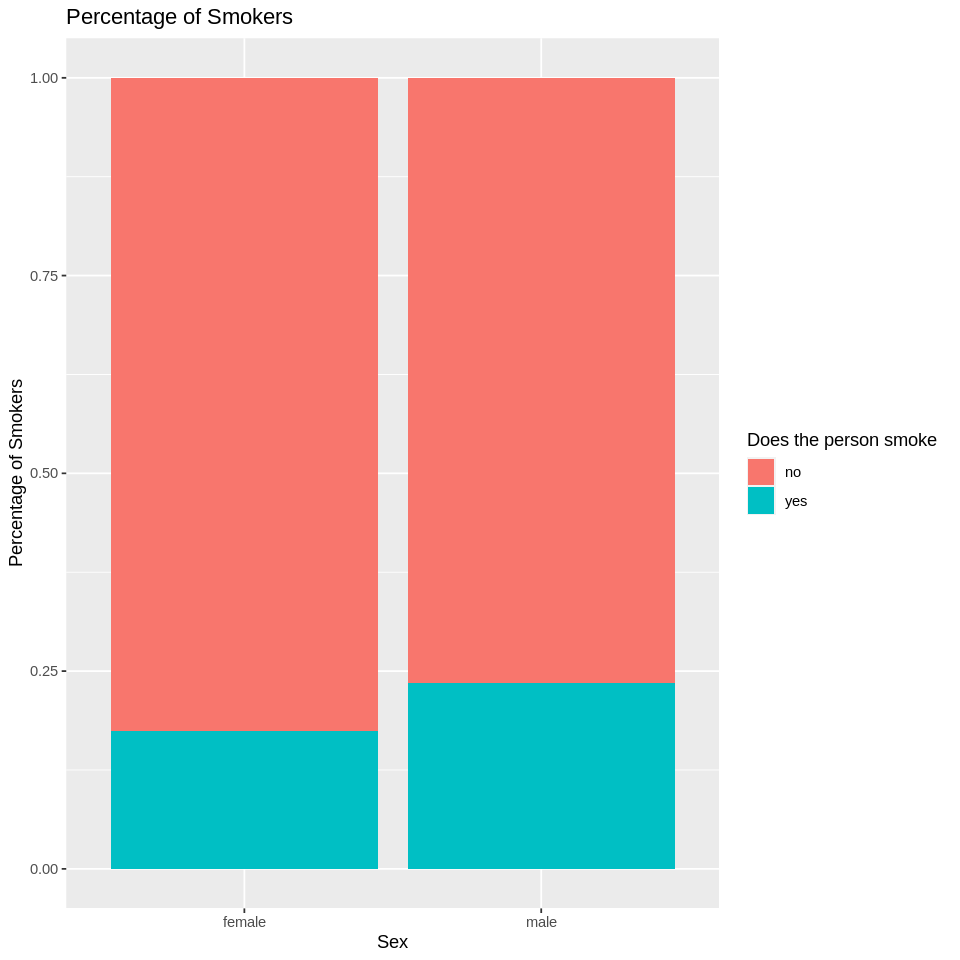

In [166]:
bar_plot <- insurance %>%
   ggplot(aes(x = sex, fill = smoker)) + 
   geom_bar(position = 'fill') + 
   xlab("Sex") +
   ylab("Percentage of Smokers") +
   labs(fill = "Does the person smoke") +
   ggtitle("Percentage of Smokers")


# your code here
# fail() # No Answer - remove if you provide an answer
bar_plot

In [167]:
test_1.10()

[1] "Success!"


**Question 1.11**
<br> {points: 1}

Based on the graph, is the proportion of smokers higher amongst men or women?

*Assign your answer to an object called `answer1.11`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"male"` or `"female"`).*

In [168]:
# Replace the fail() with your answer. 

# your code here
answer1.11 <- "male"

In [169]:
test_1.11()

[1] "Success!"


## 2. Color Palettes (beyond the defaults)
{points: 3}

In the worksheet and this tutorial, you have seen the same colours again and again. These are from the default `ggplot2` color palette. What if you want different colors? We can do this! In R, one of the libraries that provides altenative color palettes is the `RColorBrewer` library. 

For this question:

- Load the `RColorBrewer`library
- Print the list of palettes available for you with the `display.brewer.all()` function
- You can also print out a list of color blind friendly palettes with `display.brewer.all(colorblindFriendly = T)`
- Choose one of the palettes and apply it to the plot whose code is given in the cell below.
    - For the fill aesthetic with categorical variable the function is: `scale_fill_brewer(palette = '...')`
    - For the fill aesthetic with numeric variable the function is: `scale_fill_distiller(palette = '...')`
- Finally, you can also use this [color blindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) to check if your visualizations are color blind friendly

You can look more in depth into the documentation of the `scale_fill_*` functions here: https://ggplot2.tidyverse.org/reference/scale_brewer.html

*Assign your answer to an object called `diamonds_plot`.*

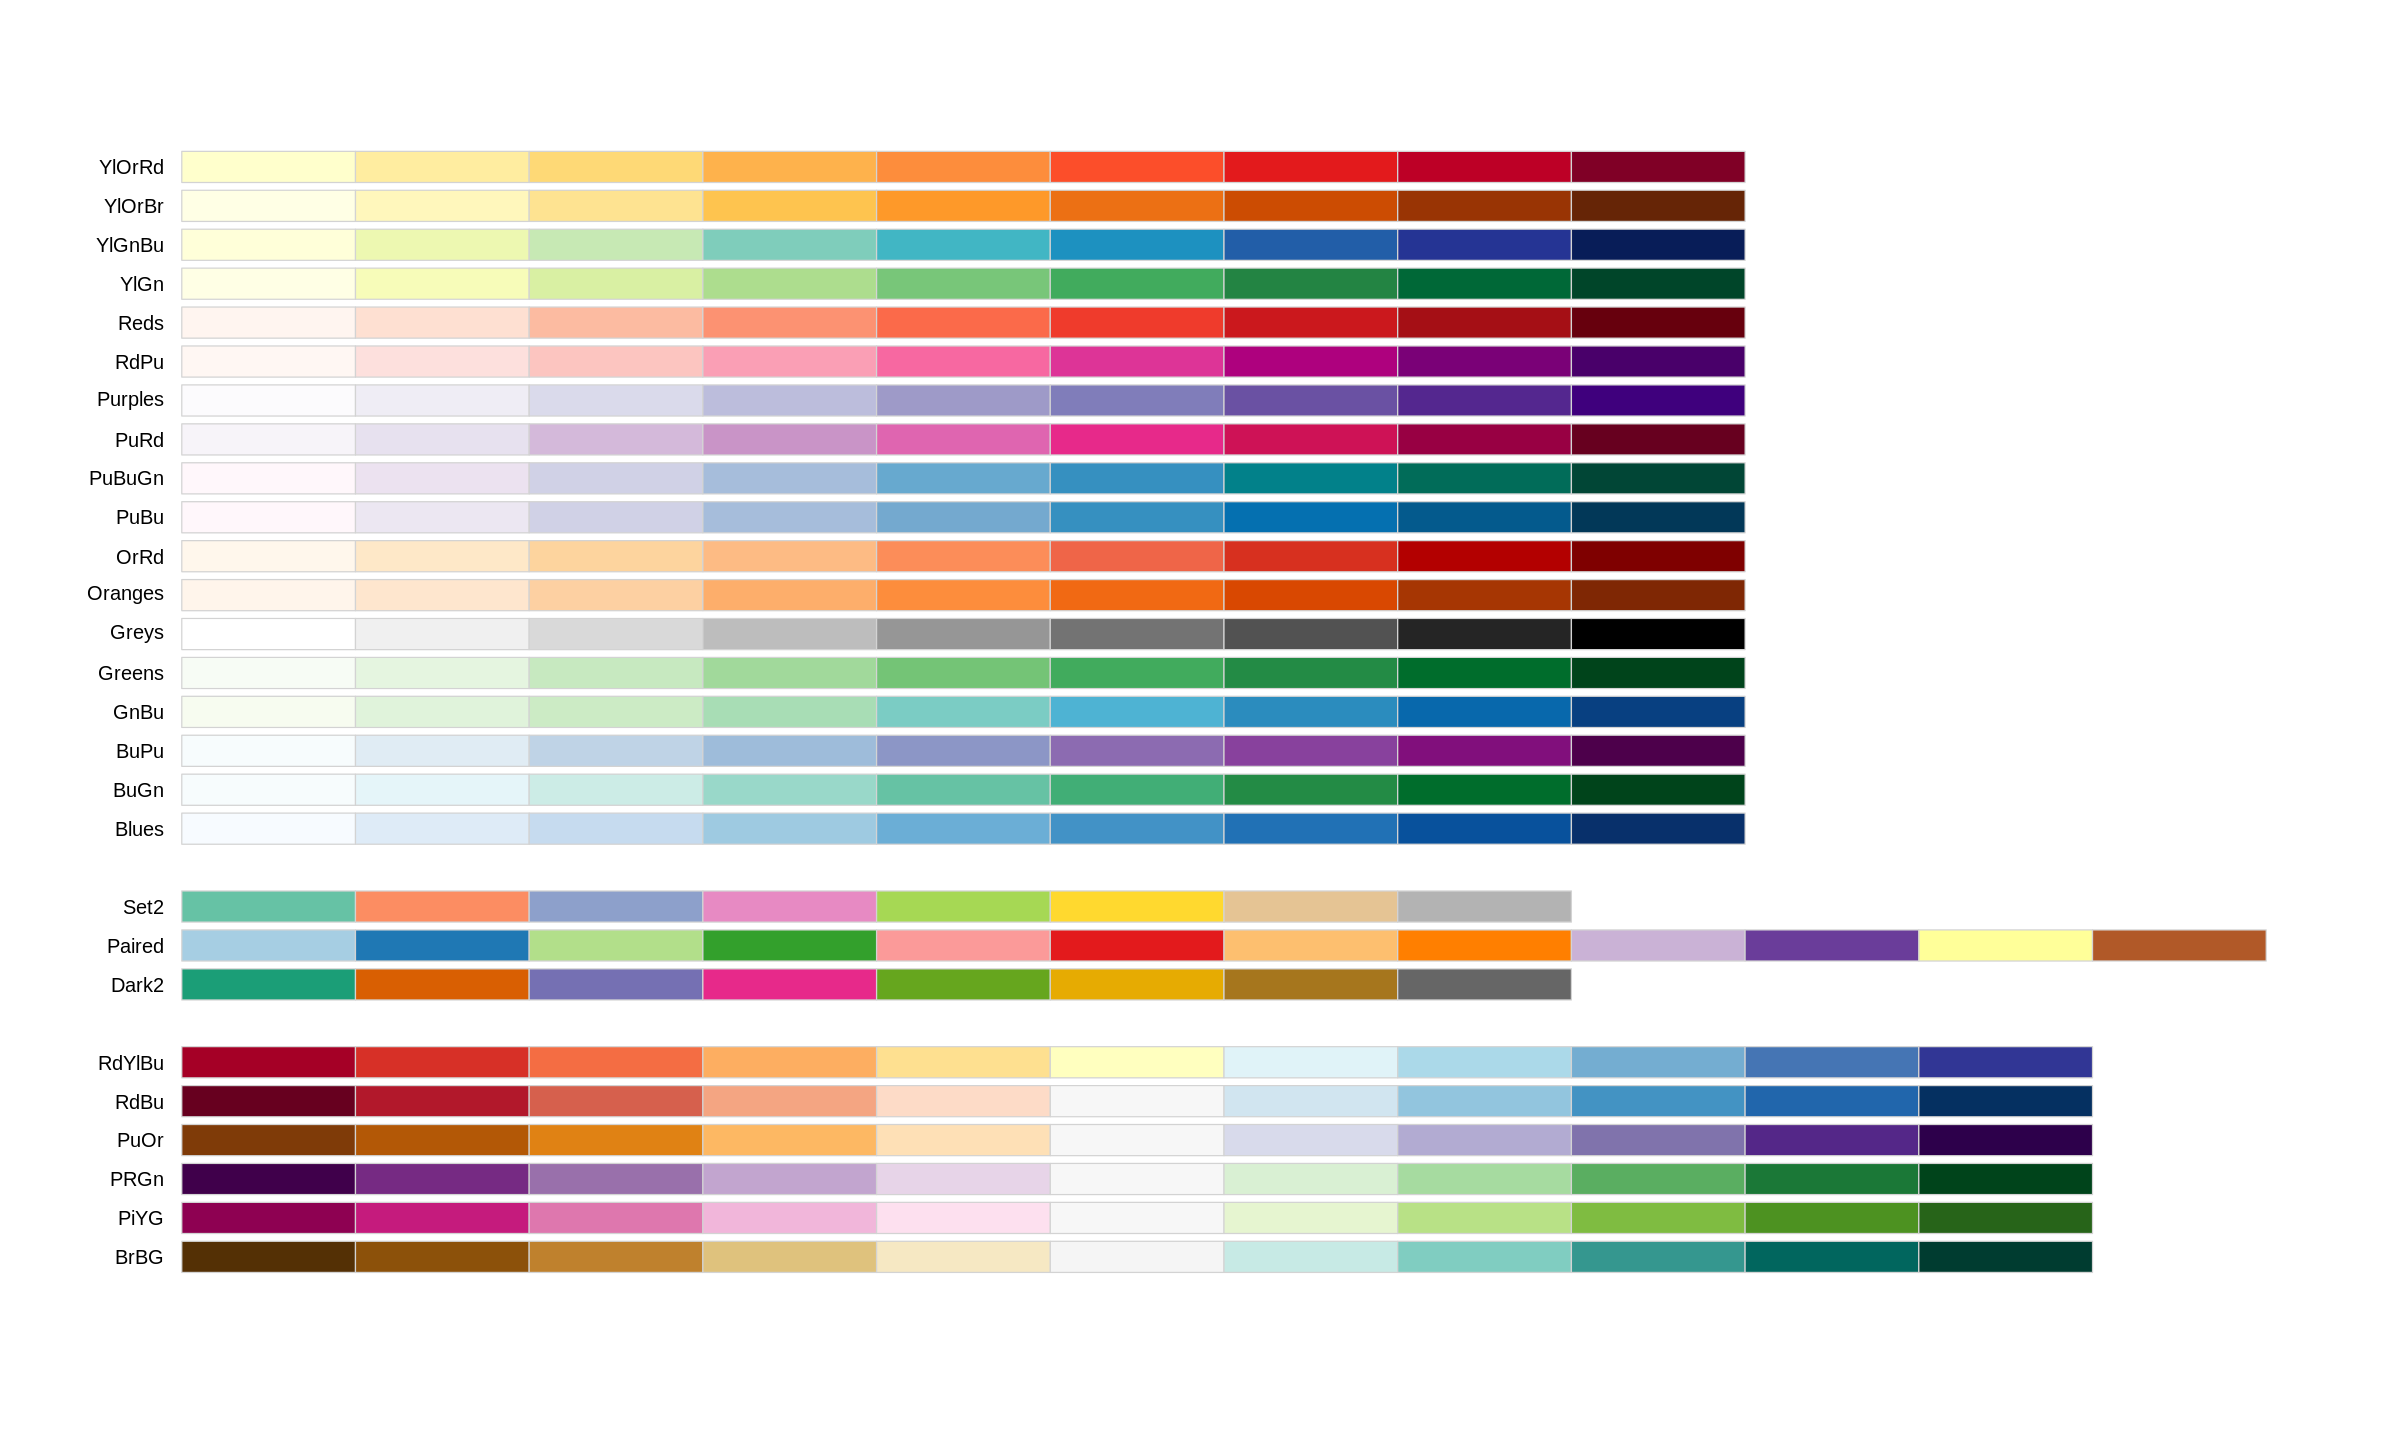

In [176]:
## Run this cell and to explore the RColorBrewer features
library(RColorBrewer)
display.brewer.all(colorblindFriendly = T)

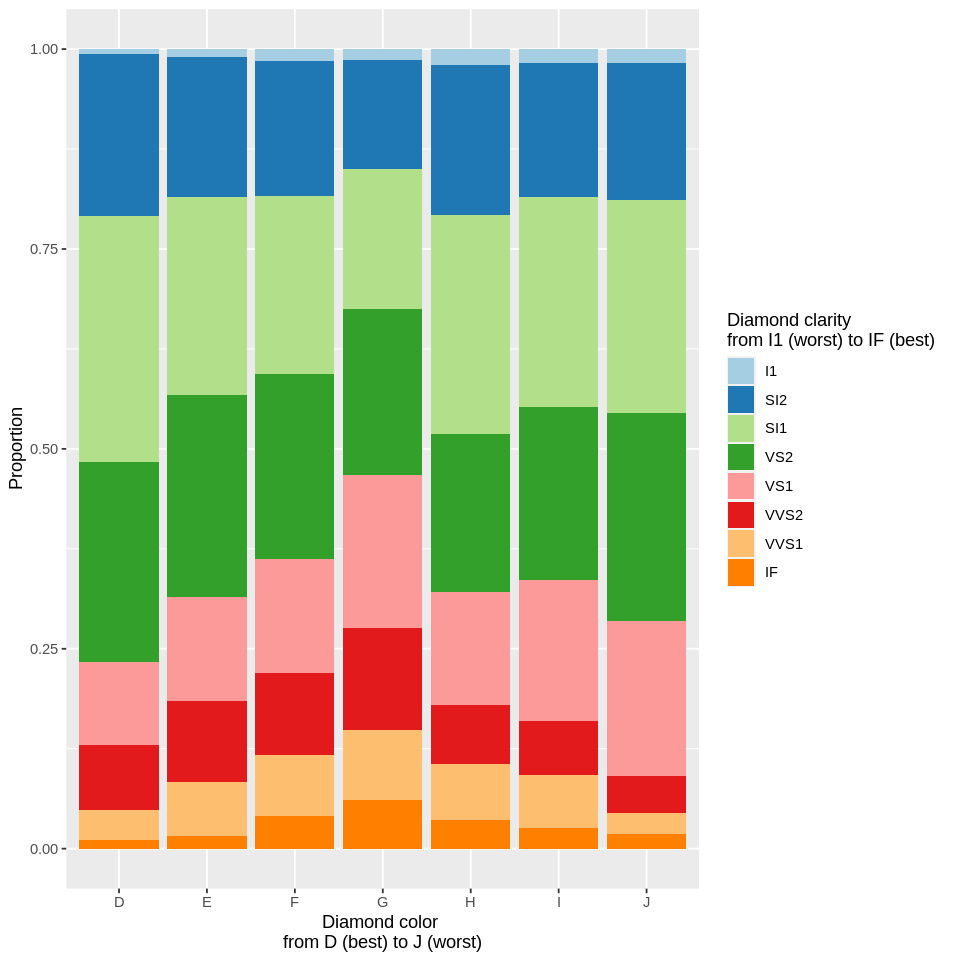

In [171]:
diamonds_plot <- diamonds %>%
    ggplot(aes(x = color, fill = clarity)) + 
    geom_bar(position = 'fill') +
    xlab('Diamond color \nfrom D (best) to J (worst)') +
    ylab('Proportion') +
    labs(fill = "Diamond clarity \nfrom I1 (worst) to IF (best)") 

#Below, insert your colour palette choice via
diamonds_plot <- diamonds_plot + 
      scale_fill_brewer(palette = "Paired")


# your code here
# fail() # No Answer - remove if you provide an answer
diamonds_plot

## 3. Fast-Food Chains in the United States (Continued)
<br> {points: 6}

In Worksheet 04, we explored this data set through some visualizations. Now, it is is all up to you. The goal of this assignment is to create **one** plot that can help you figure out which restaurant to open and where! After that you need to write a paragraph explaining your visualization and why you chose it. Also, explain your conclusion from the visualization and reasoning as to how you came to that conclusion. If you need to bring in outside information to help you answer your question, please feel free to do so.  Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.

In answering this question, there is no need to restrict yourself to the west coast of the USA. Consider all states that you have data for. You have a variety of graphs to choose from, but before starting the assignment, discuss with a partner which plot would be the most optimal to answer this question.

<img src="mcdonalds.jpg" width = "300"/>


Hint: The function `pull` from the `dplyr` package selects a column in a data frame and transforms it into a vector. Note: There are different ways you can complete this question so you don't necessarily need to use `pull` (you may find a solution without using it) but it may be helpful.


Parsed with column specification:
cols(
  name = col_character(),
  st = col_character()
)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "name"

Joining, by = "st"

`summarise()` regrouping output by 'name' (override with `.groups` argument)



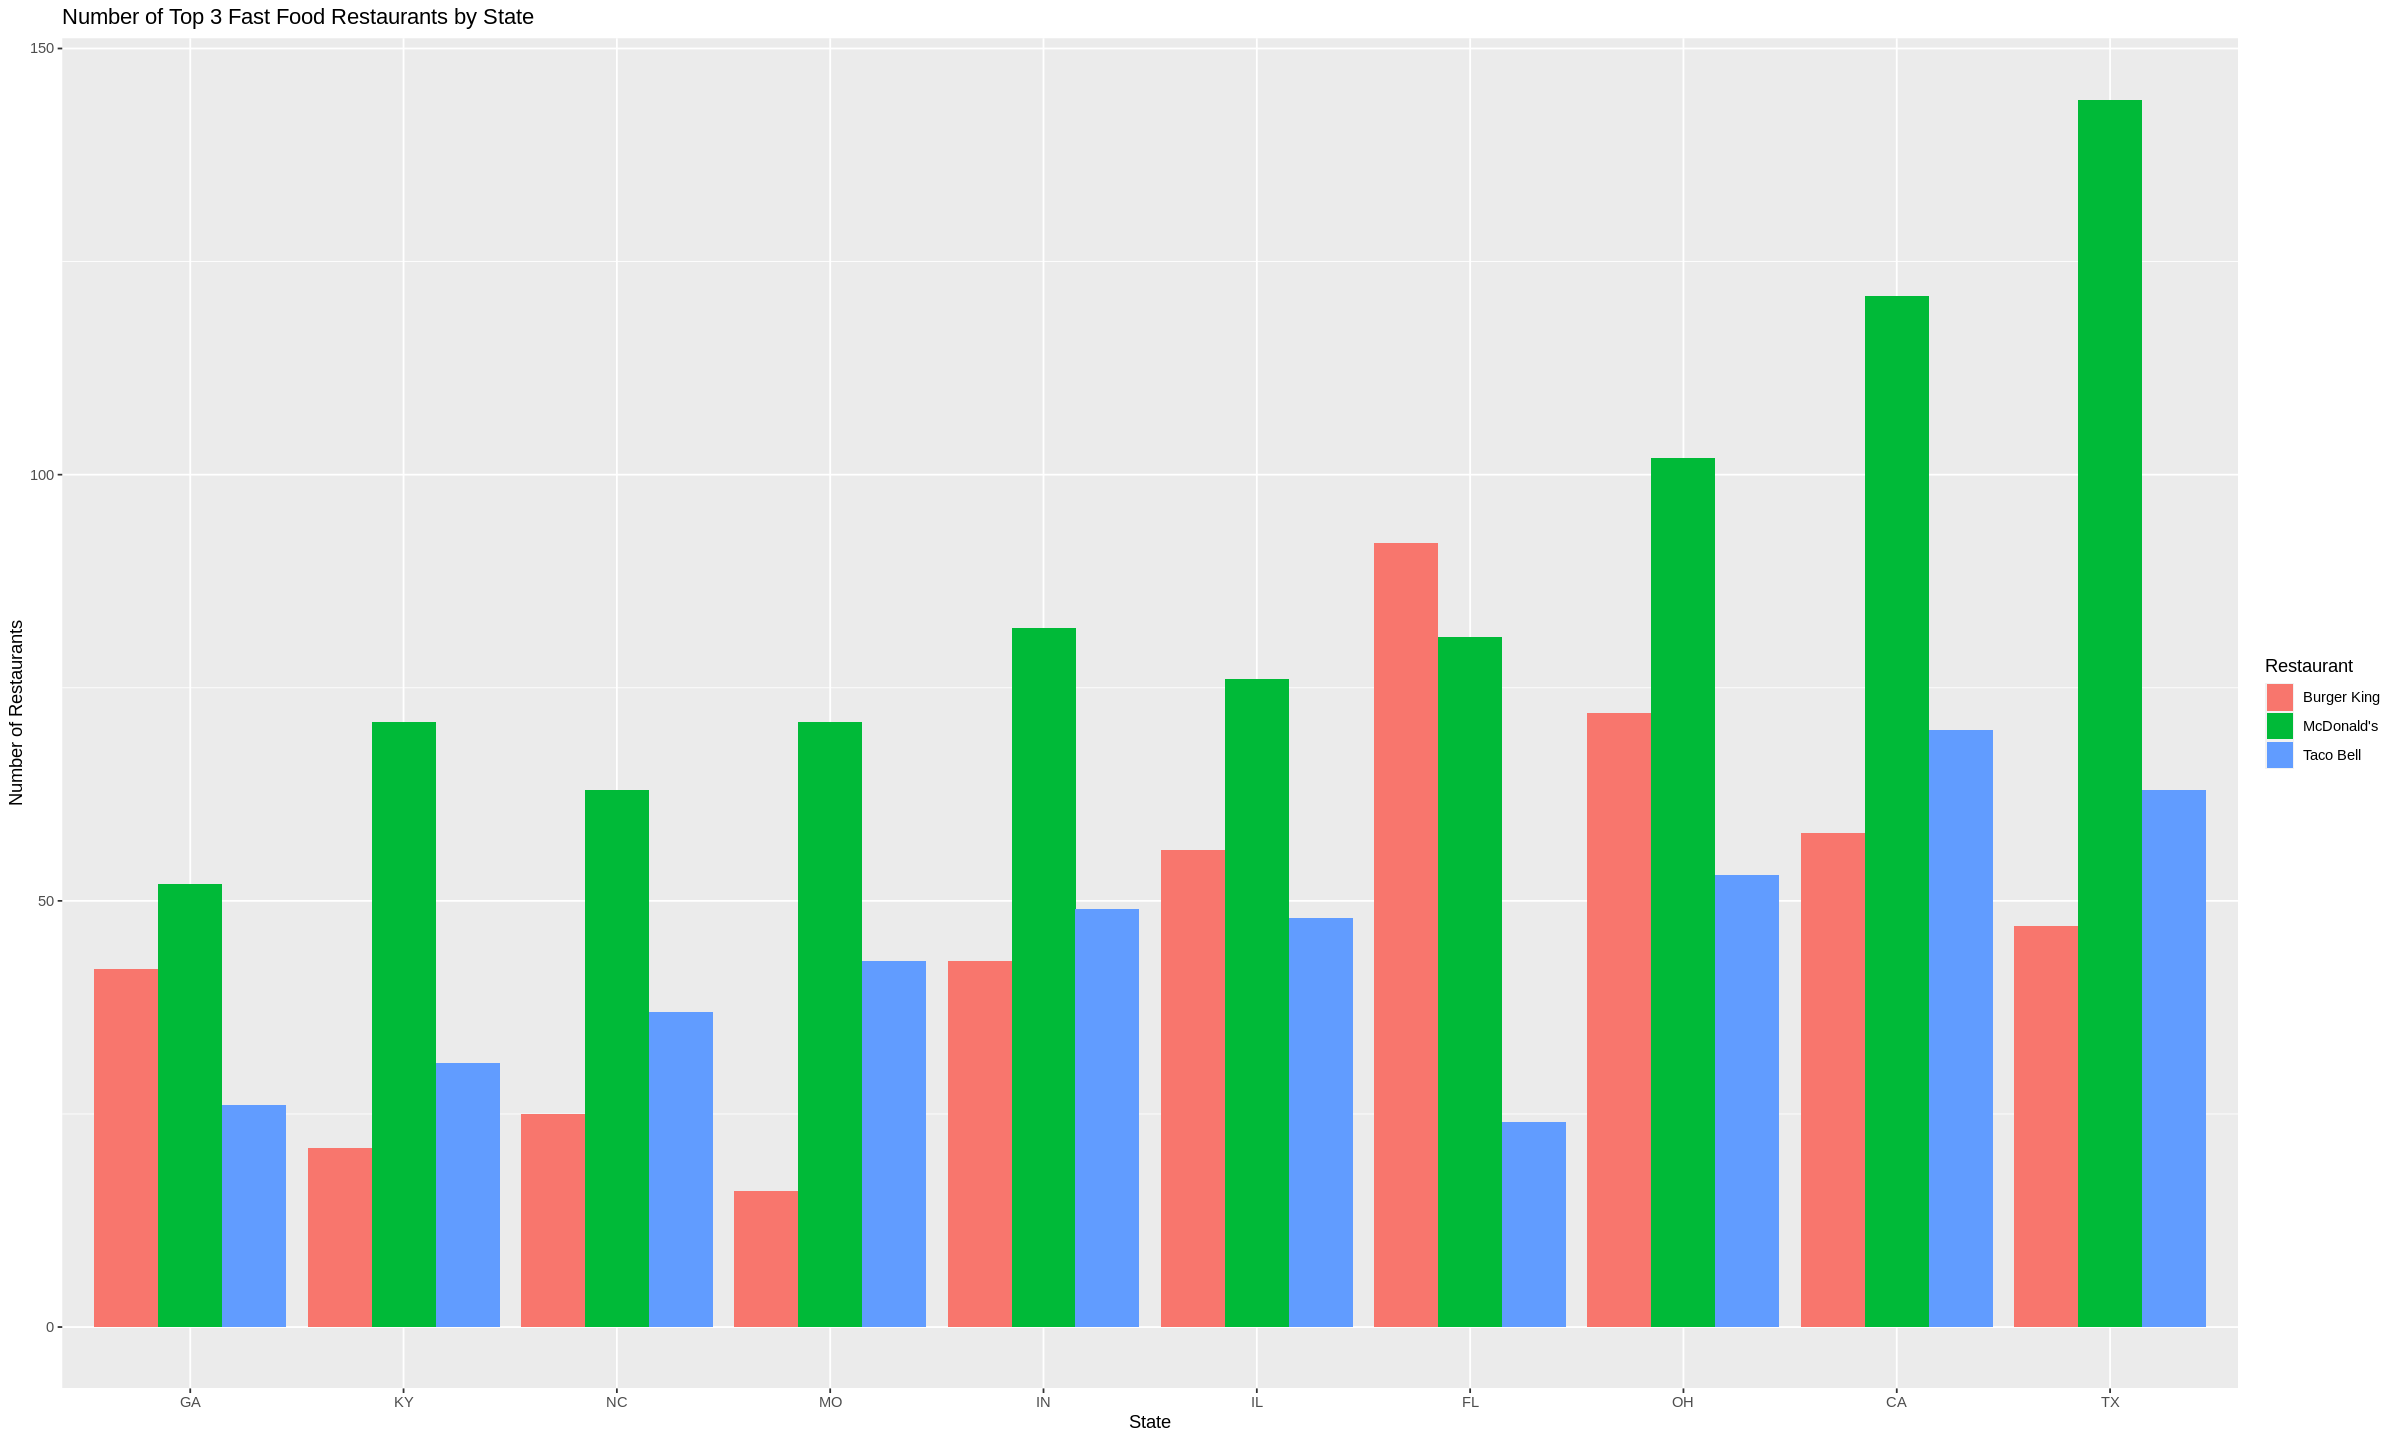

In [172]:
# write the code for your plot here
# your code here
options(repr.plot.width = 20, repr.plot.height = 12) 
fast_food <- read_csv("data/fast_food.csv")
fast_food_top <- fast_food %>%
    group_by(name) %>% summarize(n = n()) %>% arrange(desc(n)) %>% head(n = 3)


fast_food_top_states <- fast_food %>%
    group_by(st) %>% summarize(n = n()) %>% arrange(desc(n)) %>% head(n = 10)


fast_food_top <- semi_join(fast_food, fast_food_top) %>% semi_join(fast_food_top_states)
fast_food_top <- fast_food_top %>% group_by(name, st) %>% summarize(n = n()) %>% arrange(desc(n))

fast_food_top_plot <- ggplot(fast_food_top, aes(x = reorder(st, n), y = n, fill = name)) + 
    geom_bar(stat = "identity", position = "dodge") +
    xlab("State") +
    ylab("Number of Restaurants") +
    labs(fill = "Restaurant") + 
    ggtitle("Number of Top 3 Fast Food Restaurants by State")
fast_food_top_plot


*Write a paragraph explaining your visualization and why you chose it. Also explain your conclusion from the visualization and reasoning as to how you came to that conclusion. If you need to bring in outside information to help you answer your question, please feel free to do so. Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.*

I wanted to open a new fast food restaurant in a state that already had lots of restaurants. Why? Well, if you've ever been in a city's downtown, such as Vancouver, you'll notice that there feels like there is a Starbucks/McDonald's/Burger King on every block. If those locations were not popular, they would be shut down. However, they aren't. In fact, a lot of them are always booming. 

Therefore, I want to open a new restaurant where the other restaurants are, and to increase the restaurant density. Now the question is, which restaurant and which state. 

First, I filtered to the top 3 restaurants by total locations in the US. This would ensure that I was opening restaurant with lots of density in terms of established locations. Then, I filtered by the top 10 states by total fast food restraunt locations. 

With this visualization, it is clear that opening a McDonald's in Texas is what I would do. Texas has the most McDonald's locations per state, meaning it has a very high density in terms of McDonald's restaurants, which is what I'm looking for.

If there was some way to compare ALL the restaurants, I would like to do that. However, it is difficult as there are so many restaurant brands in the data set. I would also like to take into account state population, but that would require joining another data set.

In [173]:
source("cleanup_tutorial_04.R")